In [1]:
#import dependentcies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
#load the dataset 
weather_data=pd.read_csv("sankari_107_ml_project_6_weather_prediction_dataset.csv")
weather_data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [3]:
type(weather_data)

pandas.core.frame.DataFrame

In [4]:
weather_data.shape

(366, 12)

In [5]:
#getting som ebasic information
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [6]:
#remove the whitespaces to all the columns
weather_data.columns=weather_data.columns.str.strip()
weather_data.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [7]:
#check the white spaces
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [8]:
#find missing values
weather_data.isna().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [9]:
#fill in the missing values
weather_data["winddirection"].unique()


array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [10]:
# handle missing values
weather_data["winddirection"] = weather_data["winddirection"].fillna(weather_data["winddirection"].mode()[0])
weather_data["windspeed"] = weather_data["windspeed"].fillna(weather_data["windspeed"].median())

In [11]:
weather_data.isna().sum()
weather_data["winddirection"].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
       160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [12]:
#check the categories
weather_data["rainfall"].unique()

array(['yes', 'no'], dtype=object)

In [13]:
#convert categorical values into numeric
categorical_values={'yes':1, 'no':0}

weather_data["rainfall"]=weather_data["rainfall"].map(categorical_values)
weather_data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


In [14]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    int64  
 9   sunshine       366 non-null    float64
 10  winddirection  366 non-null    float64
 11  windspeed      366 non-null    float64
dtypes: float64(8), int64(4)
memory usage: 34.4 KB


In [15]:
#Exploratory Data Analysis(EDA)
weather_data.shape

(366, 12)

In [16]:
#getting statistical measeures form the dataset
weather_data.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [17]:
#columns list
weather_data.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [18]:
#day column is not necessary. drop this column
weather_data=weather_data.drop(columns=['day'],axis=1)
weather_data

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...
361,1022.7,18.8,17.7,16.9,15.0,84,90,1,0.0,30.0,18.4
362,1026.6,18.6,17.3,16.3,12.8,75,85,1,1.0,20.0,25.9
363,1025.9,18.9,17.7,16.4,13.3,75,78,1,4.6,70.0,33.4
364,1025.3,19.2,17.3,15.2,13.3,78,86,1,1.2,20.0,20.9


In [19]:
#once again check the list of columns
weather_data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

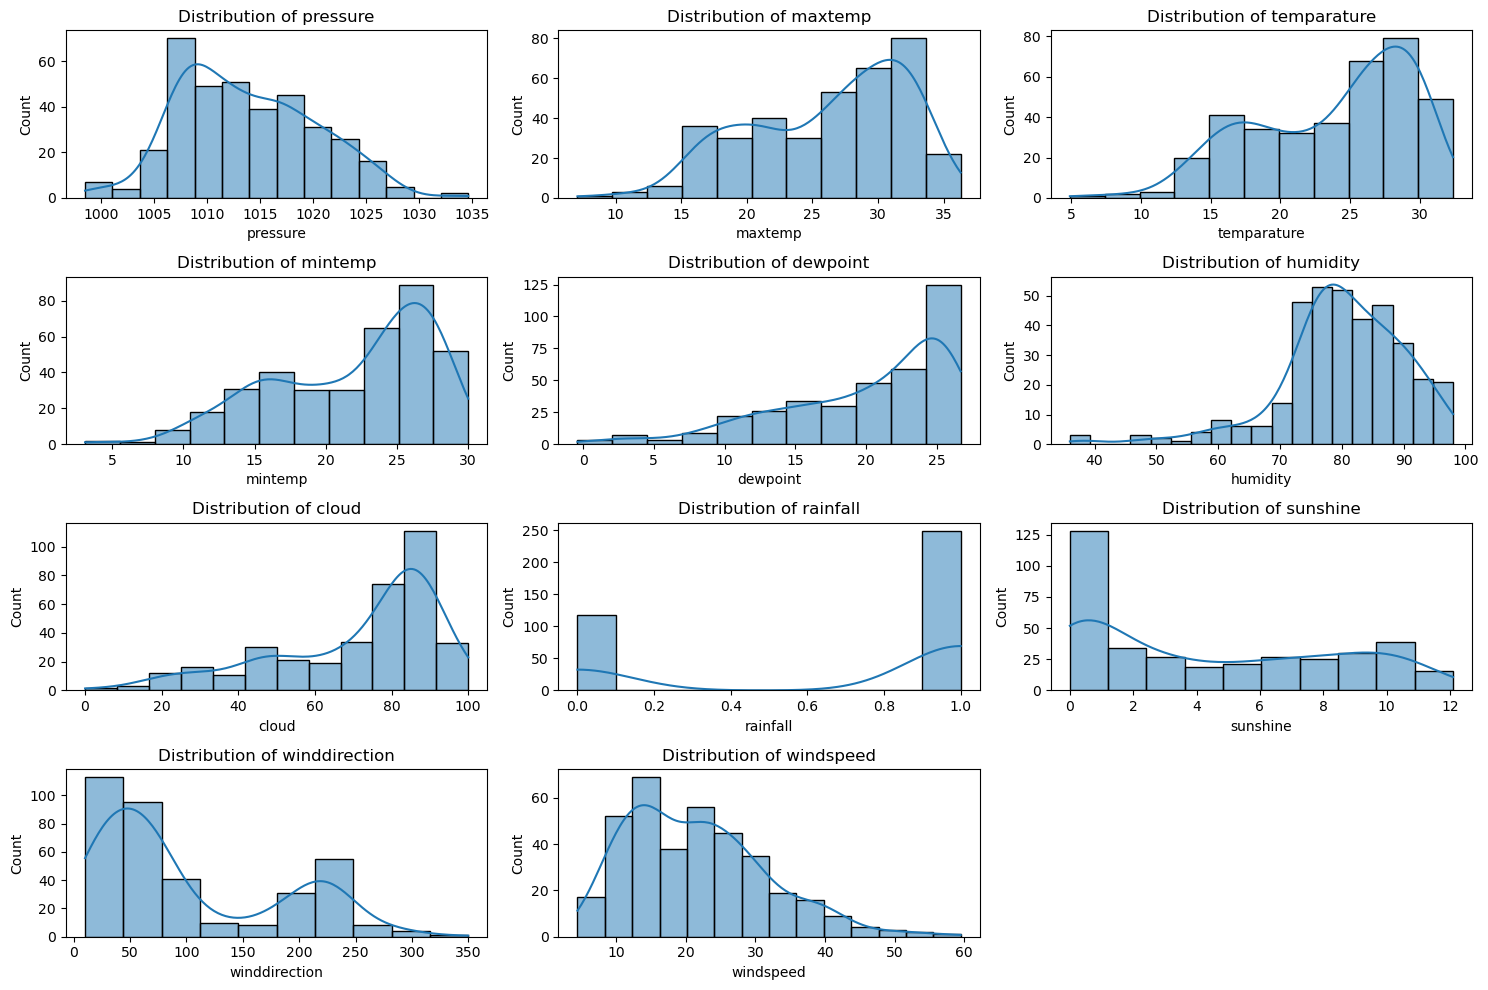

In [20]:
#create a histogram plot 
plt.figure(figsize=(15,10))

# Define columns to plot
columns = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
           'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed']

# create histograms
# Start index from 1
for i, column in enumerate(columns, 1):  
    plt.subplot(4, 3, i)  # Use (rows, cols, index)
    sns.histplot(weather_data[column], kde=True)
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

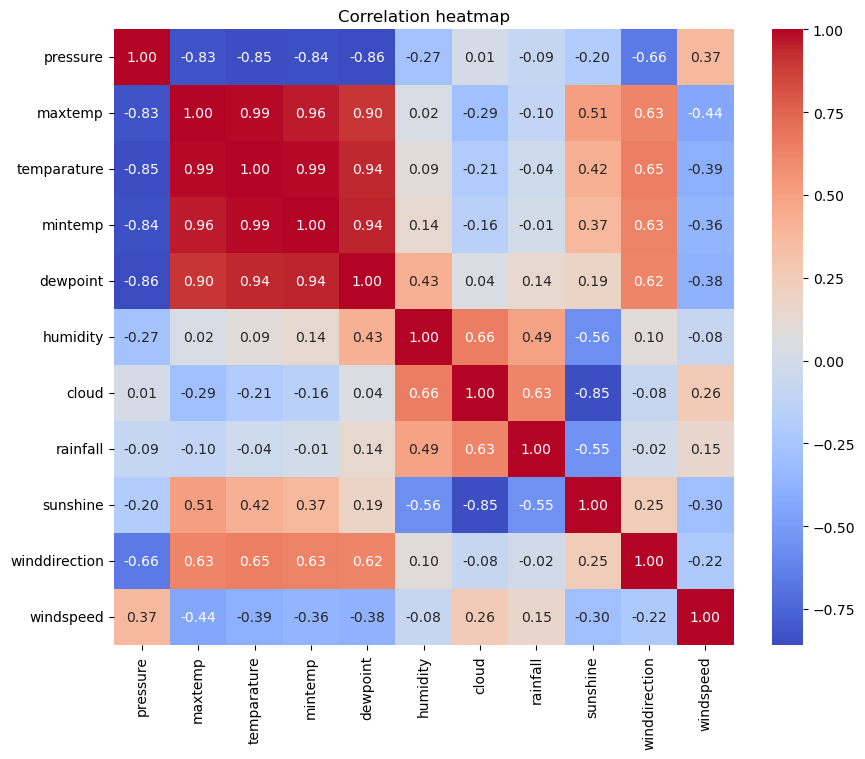

In [21]:
#heatmap plot to analyse the correlation by correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(weather_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation heatmap")
plt.show()

In [22]:
#dewpoint, minemp,temperature which are hightly correlated. we need to remove these columns.
weather_data=weather_data.drop(columns=['dewpoint', 'mintemp','temparature'],axis=1)
weather_data.head()

,pressure,maxtemp,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,95,81,1,0.0,40.0,13.7


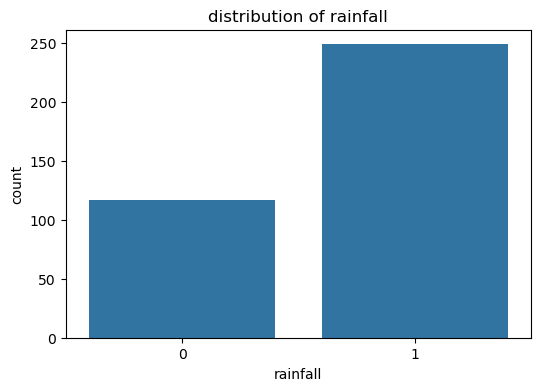

In [23]:
#Analyze the distribution of rainfall column
plt.figure(figsize=(6,4))
sns.countplot(x='rainfall',data=weather_data)
plt.title("distribution of rainfall")
plt.show()

In [24]:
#rainfall data has been highly imbalanced. So we need to balance the  rainfall values.
#first check the exact value counts 
weather_data['rainfall'].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

In [25]:
# i am going to use the over sampling technique to balance the rainfall values
from imblearn.over_sampling import SMOTE

#splitting the feature and targeted values
x = weather_data.drop(columns=['rainfall'])
y = weather_data['rainfall']

# Check class distribution before SMOTE
print("Before using the over sampling method:")
print(y.value_counts())

Before using the over sampling method:
rainfall
1    249
0    117
Name: count, dtype: int64


In [26]:
# Apply (Over Sampling Technique)
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [27]:
# Convert to DataFrame after applying the over-sampling method
weather_data_resampled = pd.DataFrame(x_resampled, columns=x.columns)
weather_data_resampled['rainfall'] = y_resampled

# Check class distribution after SMOTE technique
print("check the value counts after appling the over sampling method:")
print(weather_data_resampled['rainfall'].value_counts())

check the value counts after appling the over sampling method:
rainfall
1    249
0    249
Name: count, dtype: int64


In [28]:
# Save the balanced dataset in our given dataset.
new_file = "sankari_107_ml_project_6_weather_prediction_dataset1.csv"
weather_data_resampled.to_csv(new_file, index=False)
print("New dataset after applying the smote method: {new_file}")

New dataset after applying the smote method: {new_file}


In [29]:
#load the new dataset
weather_data_resampled=pd.read_csv(new_file)
weather_data_resampled.head()

,pressure,maxtemp,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1025.9,19.9,72,49,9.3,80.0,26.3,1
1,1022.0,21.7,81,83,0.6,50.0,15.3,1
2,1019.7,20.3,95,91,0.0,40.0,14.2,1
3,1018.9,22.3,90,88,1.0,50.0,16.9,1
4,1015.9,21.3,95,81,0.0,40.0,13.7,1


In [30]:
#define feature and targeted data
x=weather_data_resampled.drop(columns=['rainfall'])
y=weather_data_resampled['rainfall']

In [31]:
x

,pressure,maxtemp,humidity,cloud,sunshine,winddirection,windspeed
0,1025.900000,19.900000,72,49,9.300000,80.000000,26.300000
1,1022.000000,21.700000,81,83,0.600000,50.000000,15.300000
2,1019.700000,20.300000,95,91,0.000000,40.000000,14.200000
3,1018.900000,22.300000,90,88,1.000000,50.000000,16.900000
4,1015.900000,21.300000,95,81,0.000000,40.000000,13.700000
...,...,...,...,...,...,...,...
493,1032.307855,10.991857,45,25,10.056396,20.000000,29.000866
494,1013.051225,31.141146,67,48,9.196730,50.054495,39.896730
495,1017.137700,23.398366,87,84,2.769945,50.000000,14.839334
496,1008.707516,33.988176,72,23,10.812923,212.795603,9.963428


In [32]:
y

0      1
1      1
2      1
3      1
4      1
      ..
493    0
494    0
495    0
496    0
497    0
Name: rainfall, Length: 498, dtype: int64

In [33]:
weather_data_resampled.shape

(498, 8)

In [34]:
#suffle the final dataframe
weather_data_resampled=weather_data_resampled.sample(frac=1, random_state=2).reset_index(drop=True)
weather_data_resampled.head()

,pressure,maxtemp,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1025.196251,17.572813,38,10,10.200000,20.000000,38.725599,0
1,1007.300000,32.800000,81,77,6.500000,220.000000,13.900000,1
2,1016.400000,28.700000,84,70,5.900000,70.000000,18.000000,1
3,1007.500000,32.300000,85,83,4.200000,220.000000,26.100000,1
4,1005.431167,33.236965,71,44,8.724136,13.696545,8.966900,0


In [35]:
weather_data_resampled['rainfall'].value_counts()

rainfall
0    249
1    249
Name: count, dtype: int64

In [36]:
#spliting the into train and test
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [37]:
#Use the hyper parameter tune the model for better performance for various models
#load the model
log_reg=LogisticRegression(max_iter=1000, solver='liblinear')
# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],       # Regularization type
    'solver': ['liblinear']         # Supports L1 and L2 regularization
}
# Perform Grid Search
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)
# Best hyperparameters from GridSearchCV
print("Best parameters from GridSearch:", grid_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters from GridSearch: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [38]:
# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

In [39]:
# Print model performance
print("Accuracy on Test Set for LogisitcRegression model:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))

Accuracy on Test Set for LogisitcRegression model: 0.79
Classification Report:               precision    recall  f1-score   support

           0       0.87      0.76      0.81        59
           1       0.71      0.83      0.76        41

    accuracy                           0.79       100
   macro avg       0.79      0.80      0.79       100
weighted avg       0.80      0.79      0.79       100



In [40]:
#Now, i try to get the better performance by XGBclassifier
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

In [41]:
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [42]:
#predict the test data
y_preditction=model.predict(x_test)
Accuracy_score=classification_report(y_preditction,y_test)
print("weather prediction:", Accuracy_score)

weather prediction:               precision    recall  f1-score   support

           0       0.80      0.87      0.83        54
           1       0.83      0.74      0.78        46

    accuracy                           0.81       100
   macro avg       0.81      0.80      0.81       100
weighted avg       0.81      0.81      0.81       100



In [43]:
print("Accuracy on Test Set for XGBoostClassifier Model:", accuracy_score(y_test, y_preditction))

Accuracy on Test Set for XGBoostClassifier Model: 0.81


In [44]:
#when we use SVR . let us see the score value
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=1.0)
model.fit(x_train, y_train)

SVC()

In [45]:
#predict the test data
y_preditction1=model.predict(x_test)

Accuracy_score2=accuracy_score(y_preditction1,y_test)

print("Accuracy score for SVC:", Accuracy_score2)
#this  model has not performed well

Accuracy score for SVC: 0.49


In [46]:
#make the predictive system
input_data=(1016.400000,28.700000,84,70,5.900000,70.000000,18.000000)
#changing input data into a numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshape the numpy array data
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
print("Weather situation:", y_preditction[2])

if (y_preditction[2]==0):
    print("Weather situation is that the rain won't come")
else:
     print("Weather situation is that the rain will come")

Weather situation: 1
Weather situation is that the rain will come
